In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime = pd.read_csv('Crimes_-_2001_to_Present.csv')
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [4]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
crime.Description.value_counts()

SIMPLE                                         899417
$500 AND UNDER                                 621739
DOMESTIC BATTERY SIMPLE                        599013
TO VEHICLE                                     423835
OVER $500                                      404097
                                                ...  
SALE OF OBSCENE MATERIALS                           1
DISCLOSE DOMESTIC VIOLENCE VICTIM LOCATION          1
KEEP PLACE OF JUV PROSTITUTION                      1
AGGRAVATED DOMESTIC BATTERY - OTHER FIREARM         1
POSSESSION - CHEMICAL / DRY-ICE DEVICE              1
Name: Description, Length: 543, dtype: int64

In [6]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], dtype='object')

In [11]:
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [12]:
# rename some columns 
crime = crime.rename(columns={'Case Number': 'Case_num', 'Primary Type': 'Primary_type', 'Location Description': 'Location_desc', 'Community Area': 'Community_Area', 'FBI Code': 'FBI_Code', 'Updated On': 'Updated_On'})
crime.head()


,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [13]:
crime.FBI_Code.value_counts()

06     1613528
08B    1194221
14      872025
26      752438
18      700764
05      420335
08A     380793
07      358486
11      287779
03      287271
04B     210184
04A     133109
15      103198
16       69771
24       55936
10       42414
02       39157
17       38775
20       30653
19       14909
22       14801
09       12912
01A      12139
13        2977
12        1551
01B         73
Name: FBI_Code, dtype: int64

In [18]:
crime.Date = pd.to_datetime(crime.Date, format = '%m/%d/%Y %I:%M:%S %p')
crime.index = pd.DatetimeIndex(crime.Date)

In [19]:
crime.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2018-09-01 00:01:00,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


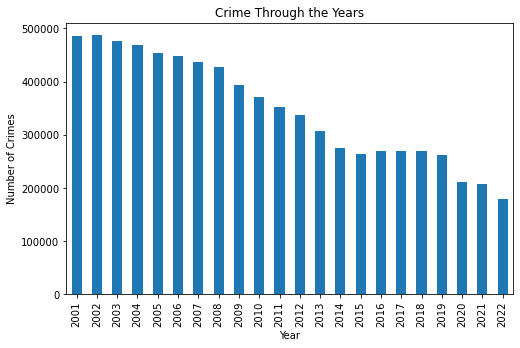

In [23]:
plt.figure(figsize = (8,5))
crime.groupby([crime.index.year]).size().plot.bar()
plt.title('Crime Through the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

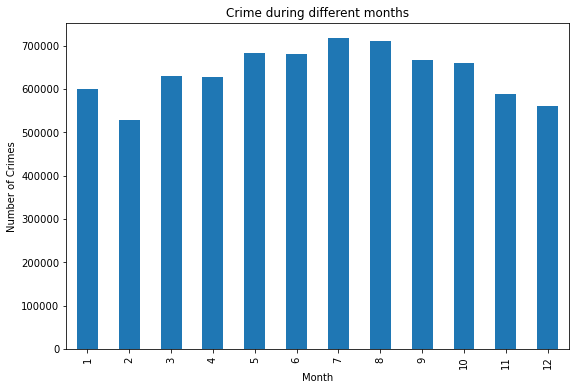

In [24]:
plt.figure(figsize = (9,6))
crime.groupby([crime.index.month]).size().plot.bar()
plt.title('Crime during different months')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

In [27]:
count = crime[['Primary_type']]

In [28]:
crime_count = pd.DataFrame(count.groupby('Primary_type').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count.head()

,Primary_type,counts
0,THEFT,1613528
1,BATTERY,1402115
2,CRIMINAL DAMAGE,872025
3,NARCOTICS,744216
4,ASSAULT,496480


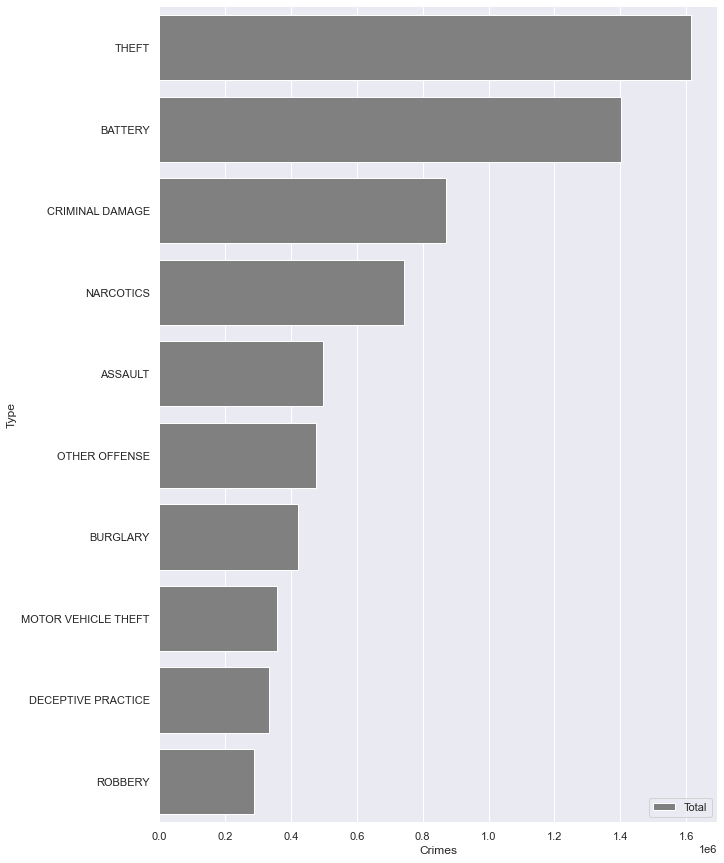

In [31]:
# crime count graph
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("pastel")
sns.barplot(y="Primary_type", x="counts", data=crime_count.iloc[:10, :],label="Total", color="grey")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)
plt.show()